## Bottleneck cross-validation

In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import glob
import ipyparallel as ipp
import momi
import os
import pandas as pd
import PTA

from IPython.display import display

pd.set_option('display.max_columns', None)

ipyclient = ipp.Client(cluster_id="ipyrad")
print(len(ipyclient))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
40


In [2]:
model = PTA.DemographicModel("expanding-counts")
model.set_param("project_dir", "./analysis/8samps_expanding_sims")
model.set_param("npops", 8)
model.set_param("nsamps", 8)
model.set_param("N_e", "1e4-1e6")
model.set_param("tau", "1e4-1e6")
model.set_param("epsilon", "2-20")
model.set_param("length", "150")
#computationally impractical to simulate 2e4 loci for 20 pops, but this is how you'd do it.
#model.set_param("num_replicates", [nloci_dict[x] for x in expanding_pops])
model.set_param("num_replicates", 500)
model.set_param("recoms_per_gen", 0)
model.set_param("muts_per_gen", 6.6e-9)
print(model.get_params())

model._hackersonly["sorted_sfs"] = False
model._hackersonly["proportional_msfs"] = False
model.simulate(nsims=4000, quiet=False, verbose=False, ipyclient=ipyclient)

------- PTA params file (v.0.0.11)----------------------------------------------
expanding-counts     ## [0] [simulation_name]: The name of this simulation scenario
/media/4TB/isaac/PTA-EasternSnakes/analysis/8samps_expanding_sims ## [1] [project_dir]: Where to save files
8                    ## [2] [npops]: Number of populations undergoing co-demographic processes
8                    ## [3] [nsamps]: Numbers of samples for each populations
10000-1000000        ## [4] [N_e]: Effective population size of the contemporary population
10000-1000000        ## [5] [tau]: Time of demographic change
2.0-20.0             ## [6] [epsilon]: Magnitude of demographic change
0                    ## [7] [zeta]: Proportion of coexpanding taxa. Default will sample U~(0, 1)
150                  ## [8] [length]: Length in bp of each independent genomic region to simulate
500,500,500,500,500,500,500,500 ## [9] [num_replicates]: Number of genomic regions to simulate
0.0                  ## [10] [recoms_pe

In [3]:
sim_df = pd.read_csv("./analysis/8samps_expanding_sims/expanding-counts-SIMOUT.csv", sep=" ")
print(len(sim_df))
sfs_cols = [col for col in sim_df.columns if col.startswith("pop")]
params_cols = [col for col in sim_df.columns if col not in sfs_cols]
display(sim_df[sfs_cols].head())
display(sim_df[params_cols].head())

4000


,pop0-[[7_1]],pop0-[[6_2]],pop0-[[5_3]],pop0-[[4_4]],pop1-[[7_1]],pop1-[[6_2]],pop1-[[5_3]],pop1-[[4_4]],pop2-[[7_1]],pop2-[[6_2]],pop2-[[5_3]],pop2-[[4_4]],pop3-[[7_1]],pop3-[[6_2]],pop3-[[5_3]],pop3-[[4_4]],pop4-[[7_1]],pop4-[[6_2]],pop4-[[5_3]],pop4-[[4_4]],pop5-[[7_1]],pop5-[[6_2]],pop5-[[5_3]],pop5-[[4_4]],pop6-[[7_1]],pop6-[[6_2]],pop6-[[5_3]],pop6-[[4_4]],pop7-[[7_1]],pop7-[[6_2]],pop7-[[5_3]],pop7-[[4_4]]
0,1535,2158,1448,559,2496,1811,1822,614,2043,1528,1576,754,2225,2015,1585,687,1516,1514,1559,1026,19868,12308,11258,4442,6494,5952,5854,3306,15945,15656,11238,5293
1,1380,1233,1048,668,1495,1138,1309,713,1622,1063,1236,654,1381,1411,1218,499,1626,1394,1030,591,1356,1453,1246,468,5105,6088,4950,1886,1367,974,998,299
2,134,79,89,28,148,99,56,27,2725,1845,2042,893,7365,7193,6993,3036,148,94,66,27,936,585,593,344,9342,8111,7191,3019,128,84,74,27
3,3906,3345,3771,1765,4671,4134,3799,1933,13908,13897,12239,4832,20066,13466,12495,6053,4254,4519,4403,2226,9830,6379,5148,2801,9337,5893,4727,2045,16145,10328,7226,4503
4,1322,1720,1219,466,1985,1336,1308,735,1692,1349,1108,426,1326,1509,1484,542,1506,1402,1369,660,2910,2566,2456,1030,1344,972,712,319,1913,1635,1545,878


,zeta,zeta_e,psi,t_s,omega,taus_mean,taus_std,taus_skewness,taus_kurtosis,taus_median,taus_iqr,epsilons_mean,epsilons_std,epsilons_skewness,epsilons_kurtosis,epsilons_median,epsilons_iqr,Ne_s_mean,Ne_s_std,Ne_s_skewness,Ne_s_kurtosis,Ne_s_median,Ne_s_iqr
0,0.607,5,1,793078,0.000,537157.250,367589.102,-0.055,-1.683,549256.0,595135.25,14.310,2.778,0.973,-0.835,13.051,2.878,616969.375,299325.329,-0.730,-0.582,699450.5,243980.00
1,0.759,6,1,711495,0.001,738440.333,27527.358,0.530,-1.500,727580.0,32375.50,10.628,3.190,0.477,-1.500,9.527,3.789,364164.500,164494.424,-0.416,-0.880,367610.5,251542.75
2,0.270,2,1,360525,0.000,517020.857,249706.249,0.293,-1.082,539483.0,374341.50,9.121,6.017,-0.261,-1.895,13.139,12.211,376387.000,304060.676,0.216,-1.595,351158.5,556348.50
3,0.157,1,0,836716,0.000,485056.500,336728.404,-0.254,-1.687,594973.0,659367.75,10.246,4.939,0.791,-0.657,9.119,5.500,764300.625,166742.959,-0.412,-1.274,810950.5,252601.00
4,0.609,5,1,292252,0.000,645578.750,219634.113,-0.666,-0.907,697470.0,173442.75,12.774,6.010,-0.529,-1.012,13.925,5.991,431267.750,170923.109,-0.201,-0.920,434139.0,230257.75


In [4]:
from sklearn.ensemble import RandomForestRegressor
rgr_params = {'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 70,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
# This is super dumb
sim_df = pd.read_csv("./analysis/8samps_expanding_sims/expanding-counts-SIMOUT.csv", sep=" ")
synthetic_community = pd.DataFrame(sim_df.loc[0]).T.drop(PTA.inference.default_targets, axis=1)


4000
Removed invariant targets. Retained: ['zeta', 'zeta_e', 'psi', 't_s', 'omega', 'taus_mean', 'taus_std', 'taus_skewness', 'taus_kurtosis', 'taus_median', 'taus_iqr', 'epsilons_mean', 'epsilons_std', 'epsilons_skewness', 'epsilons_kurtosis', 'epsilons_median', 'epsilons_iqr', 'Ne_s_mean', 'Ne_s_std', 'Ne_s_skewness', 'Ne_s_kurtosis', 'Ne_s_median', 'Ne_s_iqr']
Predict() started: 2021-09-14 09:37:22.069597
Predict() finished: 2021-09-14 09:37:30.401643
                             MAE         RMSE    vscore        R2
zeta                    0.139978     0.002650  0.654348  0.653754
zeta_e                  1.110788     0.021239  0.662105  0.661510
psi                     0.229626     0.004948  0.346646  0.346388
t_s                197166.301607  3745.068358  0.307092  0.307063
omega                   0.005673     0.002178 -0.011359 -0.011360
taus_mean          105008.627839  2137.168458  0.183642  0.183632
taus_std            64569.743143  1284.915560  0.294721  0.294389
taus_skewness

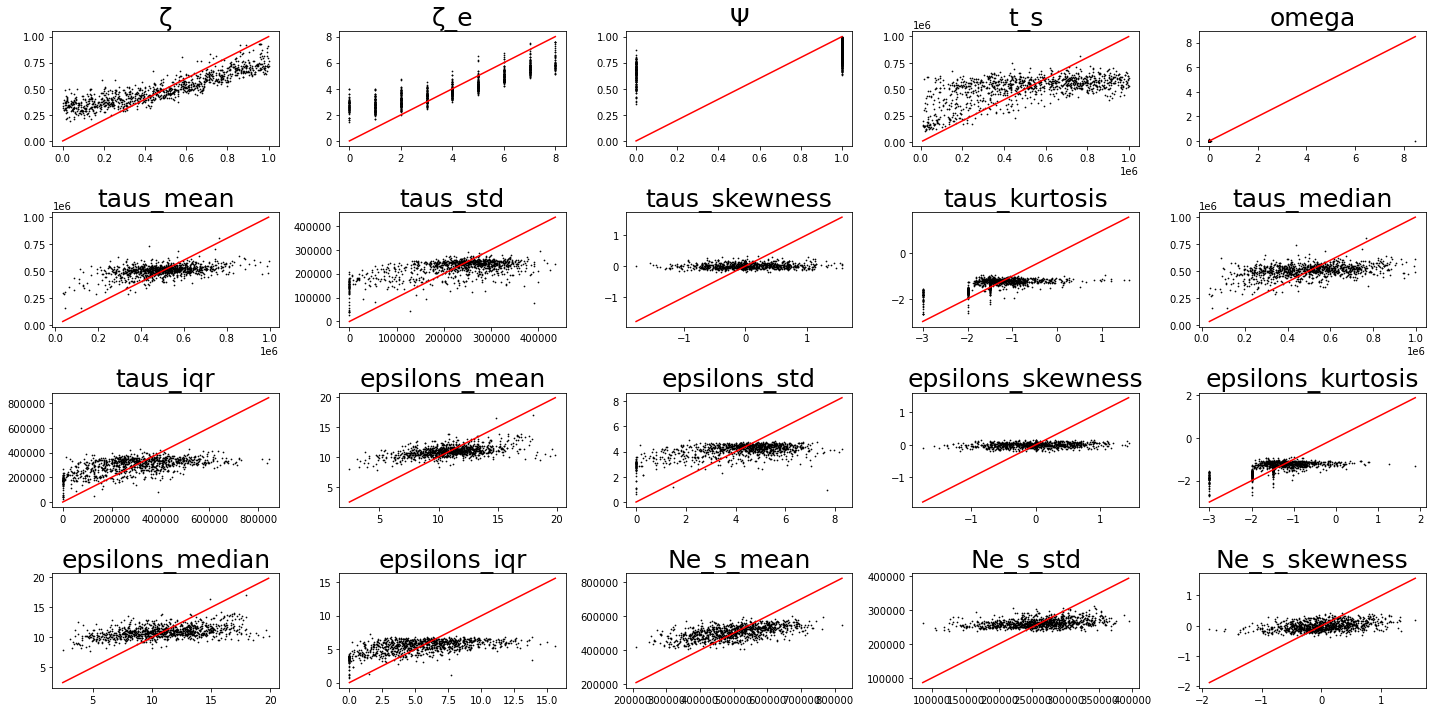

In [7]:
sim_df1 = pd.read_csv("./analysis/8samps_expanding_sims/expanding-counts-SIMOUT.csv", sep=" ")
print(len(sim_df1))
rgr1 = PTA.inference.Regressor(empirical_df=synthetic_community,\
                                sims=sim_df1,\
                                algorithm="rf",\
                                verbose=True)
rgr1.set_params(rgr_params)
rgr1.predict(select_features=False,\
            param_search=False,\
            quick=False,\
            verbose=True)
cv_preds1 = rgr1.cross_val_predict(verbose=True)
cv_scores1 = rgr1.cross_val_score(verbose=True)
ax = rgr1.plot_cv_predictions(figsize=(20,10), figdims=(4,5))

## Sorted summary statistics

In [8]:
model = PTA.DemographicModel("expanding-sorted-counts")
model.set_param("project_dir", "./analysis/8samps_expanding_sims")
model.set_param("npops", 8)
model.set_param("nsamps", 8)
model.set_param("N_e", "1e4-1e6")
model.set_param("tau", "1e4-1e6")
model.set_param("epsilon", "2-20")
model.set_param("length", "150")
#computationally impractical to simulate 2e4 loci for 20 pops, but this is how you'd do it.
#model.set_param("num_replicates", [nloci_dict[x] for x in expanding_pops])
model.set_param("num_replicates", 500)
model.set_param("recoms_per_gen", 0)
model.set_param("muts_per_gen", 6.6e-9)
print(model.get_params())

model._hackersonly["sorted_sfs"] = True
model._hackersonly["proportional_msfs"] = False
model.simulate(nsims=4000, quiet=False, verbose=False, ipyclient=ipyclient)

------- PTA params file (v.0.0.11)----------------------------------------------
expanding-sorted-counts ## [0] [simulation_name]: The name of this simulation scenario
/media/4TB/isaac/PTA-EasternSnakes/analysis/8samps_expanding_sims ## [1] [project_dir]: Where to save files
8                    ## [2] [npops]: Number of populations undergoing co-demographic processes
8                    ## [3] [nsamps]: Numbers of samples for each populations
10000-1000000        ## [4] [N_e]: Effective population size of the contemporary population
10000-1000000        ## [5] [tau]: Time of demographic change
2.0-20.0             ## [6] [epsilon]: Magnitude of demographic change
0                    ## [7] [zeta]: Proportion of coexpanding taxa. Default will sample U~(0, 1)
150                  ## [8] [length]: Length in bp of each independent genomic region to simulate
500,500,500,500,500,500,500,500 ## [9] [num_replicates]: Number of genomic regions to simulate
0.0                  ## [10] [recoms

4000
Removed invariant targets. Retained: ['zeta', 'zeta_e', 'psi', 't_s', 'omega', 'taus_mean', 'taus_std', 'taus_skewness', 'taus_kurtosis', 'taus_median', 'taus_iqr', 'epsilons_mean', 'epsilons_std', 'epsilons_skewness', 'epsilons_kurtosis', 'epsilons_median', 'epsilons_iqr', 'Ne_s_mean', 'Ne_s_std', 'Ne_s_skewness', 'Ne_s_kurtosis', 'Ne_s_median', 'Ne_s_iqr']
Predict() started: 2021-09-14 10:28:13.535334
Predict() finished: 2021-09-14 10:28:22.069597
                             MAE         RMSE    vscore        R2
zeta                    0.113143     0.002216  0.764005  0.764004
zeta_e                  0.892990     0.017543  0.776394  0.776394
psi                     0.225588     0.005100  0.294383  0.294371
t_s                213117.793287  4001.028725  0.221219  0.221176
omega                   0.266378     0.128229 -0.025652 -0.025652
taus_mean          105711.633050  2146.826376  0.232951  0.232891
taus_std            63259.682887  1276.052834  0.349995  0.349964
taus_skewness

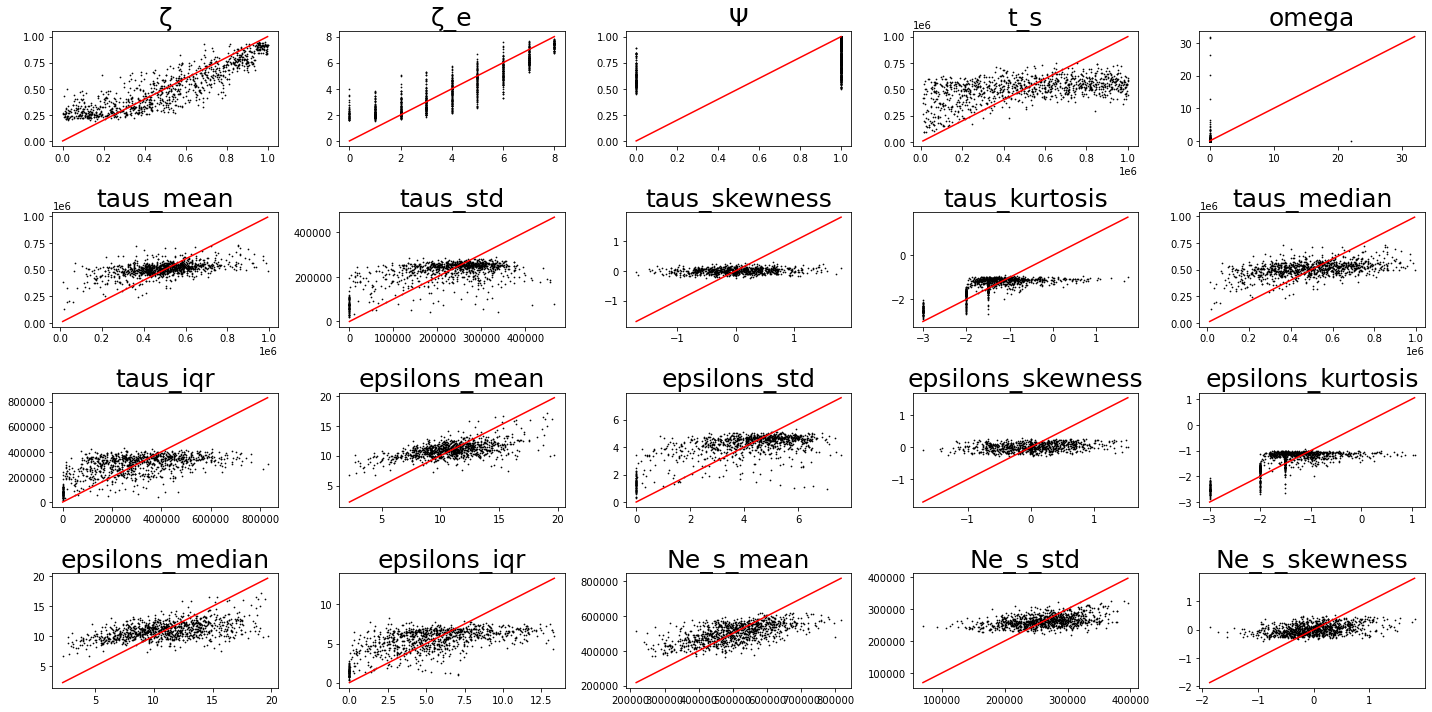

In [9]:
sim_df2 = pd.read_csv("./analysis/8samps_expanding_sims/expanding-sorted-counts-SIMOUT.csv", sep=" ")
print(len(sim_df2))
rgr1 = PTA.inference.Regressor(empirical_df=synthetic_community,\
                                sims=sim_df2,\
                                algorithm="rf",\
                                verbose=True)
rgr1.set_params(rgr_params)
rgr1.predict(select_features=False,\
            param_search=False,\
            quick=False,\
            verbose=True)
cv_preds1 = rgr1.cross_val_predict(verbose=True)
cv_scores1 = rgr1.cross_val_score(verbose=True)
ax = rgr1.plot_cv_predictions(figsize=(20,10), figdims=(4,5))